# Figure 2, Panels A and B

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
# from directory_paths import SAVE_DIR, PARENT_DIR

SAVE_DIR = "/media/data/merkourios"
DATA_DIR = "/media/data/merkourios/cleaned_smooth"

In [2]:
params = {
   'axes.labelsize': 22,
   'legend.fontsize': 10,
   'xtick.labelsize': 18,
   'ytick.labelsize': 18,
   'text.usetex': False,
   'figure.figsize': [8,8],
   'font.size': 36,
   'axes.linewidth': 2,
   'xtick.major.size': 5,
   'xtick.major.width': 2,
   'ytick.major.size': 5,
   'ytick.major.width': 2
   }

plt.rcParams.update(params)

In [ ]:
with h5py.File(os.path.join(DATA_DIR, "flag_pcr_training.hdf5"), 'r') as f:
    print(f.keys())
    endeffector_coords = f['endeffector_coords'][()]

<KeysViewHDF5 ['endeffector_coords', 'joint_coords', 'muscle_accelerations', 'muscle_lengths', 'muscle_velocities', 'spindle_info']>


## Panel A, Left

In [4]:
# Keep 30k samples to match the training data
endeffector_coords = endeffector_coords[:30000]

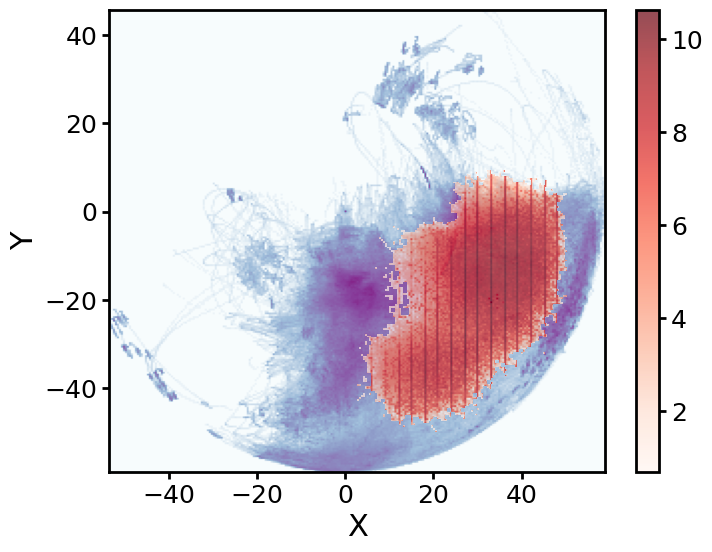

In [5]:
# Assuming two datasets: endeffector_coords1 and endeffector_coords2

# Flatten the X and Y coordinates for both datasets
x_coords1 = endeffector_coords[:5367, 0, :].flatten()
y_coords1 = endeffector_coords[:5367, 1, :].flatten()

x_coords2 = endeffector_coords[5367:, 0, :].flatten()
y_coords2 = endeffector_coords[5367:, 1, :].flatten()

# Define bins for X and Y
x_bins = np.linspace(min(np.min(x_coords1), np.min(x_coords2)), max(np.max(x_coords1), np.max(x_coords2)), 250)
y_bins = np.linspace(min(np.min(y_coords1), np.min(y_coords2)), max(np.max(y_coords1), np.max(y_coords2)), 250)

# Compute 2D histograms
hist1, x_edges, y_edges = np.histogram2d(x_coords1, y_coords1, bins=[x_bins, y_bins])
hist2, _, _ = np.histogram2d(x_coords2, y_coords2, bins=[x_bins, y_bins])

# Apply logarithmic scaling
hist1_log = np.log1p(hist1) # log1p(x) = log(1 + x)
hist2_log = np.log1p(hist2) # Normalize by the maximum value for better comparison

hist2_masked = np.ma.masked_where(hist2_log < 0.5, hist2_log)

# Plot the first histogram
plt.figure(figsize=(8, 6))
extent = [x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]]  # Define the extent of the plot
plt.imshow(hist1_log.T, origin='lower', aspect='auto', extent=extent, cmap='BuPu', alpha=1, label='Dataset 1')

# Overlay the second histogram
plt.imshow(hist2_masked.T, origin='lower', aspect='auto', extent=extent, cmap='Reds', alpha=0.7, label='Dataset 2')

# Add colorbars for reference
plt.colorbar()

# Add labels and titles
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [6]:
# Compute the percentage of bins that have at least 1 count in both datasets
percentage_1 = np.sum(hist1 > 0) / hist1.size
percentage_2 = np.sum(hist2 > 0) / hist2.size
print(f"Percentage of bins with at least 1 count in dataset 1: {percentage_1:.2f}")
print(f"Percentage of bins with at least 1 count in dataset 2: {percentage_2:.2f}")

Percentage of bins with at least 1 count in dataset 1: 0.44
Percentage of bins with at least 1 count in dataset 2: 0.16


In [7]:
def compare_histogram_coverage(hist1, hist2, threshold=0):
    """
    Compare the coverage of two histograms by calculating the percentage of bins
    that have counts above a threshold.
    
    Parameters:
    -----------
    hist1, hist2 : np.ndarray
        2D histogram arrays
    threshold : float
        Minimum count to consider a bin as occupied
        
    Returns:
    --------
    coverage1, coverage2 : float
        Percentage of occupied bins in each histogram
    p_value : float
        P-value from binomial test comparing proportions
    """
    from scipy import stats
    
    # Calculate number of occupied bins
    occupied1 = np.sum(hist1 > threshold)
    occupied2 = np.sum(hist2 > threshold)
    
    # Calculate total number of bins
    total_bins = hist1.size
    
    # Calculate coverage percentages
    coverage1 = occupied1 / total_bins * 100
    coverage2 = occupied2 / total_bins * 100
    
    # Perform binomial test
    p_value = stats.binomtest(occupied1, total_bins, p=occupied2/total_bins).pvalue
    
    return coverage1, coverage2, p_value

# Example usage:
coverage1, coverage2, p_value = compare_histogram_coverage(hist1, hist2)
print(f"Histogram 1 coverage: {coverage1:.2f}%")
print(f"Histogram 2 coverage: {coverage2:.2f}%")
print(f"P-value: {p_value}")

Histogram 1 coverage: 44.35%
Histogram 2 coverage: 16.24%
P-value: 0.0


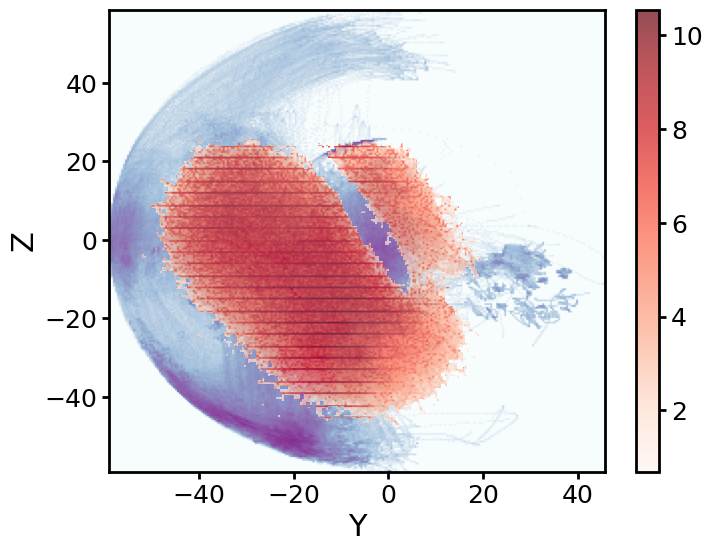

In [8]:
# Assuming two datasets: endeffector_coords1 and endeffector_coords2

# Flatten the X and Y coordinates for both datasets
y_coords1 = endeffector_coords[:5367, 1, :].flatten()
z_coords1 = endeffector_coords[:5367, 2, :].flatten()

y_coords2 = endeffector_coords[5367:, 1, :].flatten()
z_coords2 = endeffector_coords[5367:, 2, :].flatten()

# Define bins for X and Y
y_bins = np.linspace(min(np.min(y_coords1), np.min(y_coords2)), max(np.max(y_coords1), np.max(y_coords2)), 250)
z_bins = np.linspace(min(np.min(z_coords1), np.min(z_coords2)), max(np.max(z_coords1), np.max(z_coords2)), 250)

# Compute 2D histograms
hist1, y_edges, z_edges = np.histogram2d(y_coords1, z_coords1, bins=[y_bins, z_bins])
hist2, _, _ = np.histogram2d(y_coords2, z_coords2, bins=[y_bins, z_bins])

# Apply logarithmic scaling
hist1_log = np.log1p(hist1) # log1p(x) = log(1 + x)
hist2_log = np.log1p(hist2) # Normalize by the maximum value for better comparison

hist2_masked = np.ma.masked_where(hist2_log < 0.5, hist2_log)

# Plot the first histogram
plt.figure(figsize=(8, 6))
extent = [y_edges[0], y_edges[-1], z_edges[0], z_edges[-1]]  # Define the extent of the plot
plt.imshow(hist1_log.T, origin='lower', aspect='auto', extent=extent, cmap='BuPu', alpha=1, label='Dataset 1')

# Overlay the second histogram
plt.imshow(hist2_masked.T, origin='lower', aspect='auto', extent=extent, cmap='Reds', alpha=0.7, label='Dataset 2')

# Add colorbars for reference
plt.colorbar()

# Add labels and titles
plt.xlabel("Y")
plt.ylabel("Z")

plt.show()

In [9]:
coverage1, coverage2, p_value = compare_histogram_coverage(hist1, hist2)
print(f"Histogram 1 coverage: {coverage1:.2f}%")
print(f"Histogram 2 coverage: {coverage2:.2f}%")
print(f"P-value: {p_value}")

Histogram 1 coverage: 51.03%
Histogram 2 coverage: 29.54%
P-value: 0.0


## Panel A, Right

In [ ]:
with h5py.File(os.path.join(DATA_DIR, "flag_pcr_training.hdf5"), 'r') as f:
    print(f.keys())
    lengths = f['muscle_lengths'][()]
    velocities = f['muscle_velocities'][()]
    accelerations = f['muscle_accelerations'][()]

<KeysViewHDF5 ['endeffector_coords', 'joint_coords', 'muscle_accelerations', 'muscle_lengths', 'muscle_velocities', 'spindle_info']>


In [15]:
biceps_length_flag = lengths[:5367, 16, :]
triceps_length_flag = lengths[:5367, 24, :]

biceps_velocity_flag = velocities[:5367, 16, :]
triceps_velocity_flag = velocities[:5367, 24, :]

biceps_acceleration_flag = accelerations[:5367, 16, :]
triceps_acceleration_flag = accelerations[:5367, 24, :]

biceps_length_pcr = lengths[5367:30000, 16, :]
triceps_length_pcr = lengths[5367:30000, 24, :]

biceps_velocity_pcr = velocities[5367:30000, 16, :]
triceps_velocity_pcr = velocities[5367:30000, 24, :]

biceps_acceleration_pcr = accelerations[5367:30000, 16, :]
triceps_acceleration_pcr = accelerations[5367:30000, 24, :]

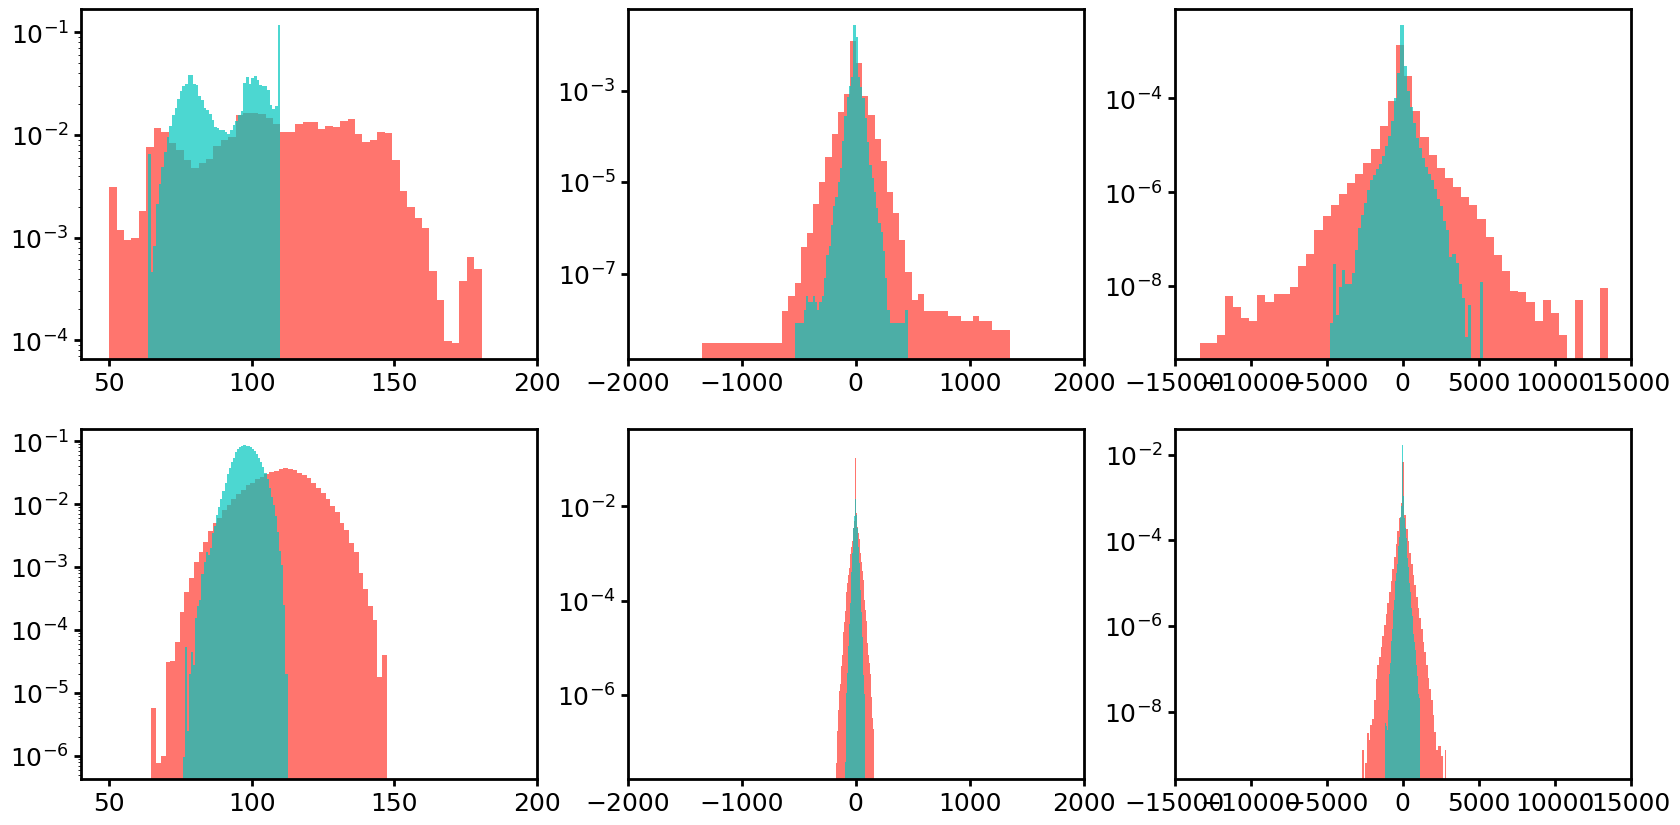

In [ ]:
# Histogram of biceps and triceps length, velocity, and acceleration

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

triceps_color = "00C7BE" # Hex value
biceps_color = "FF3B30" # Hex value

triceps_color = [int(triceps_color[i:i+2], 16) / 255 for i in (0, 2, 4)]
biceps_color = [int(biceps_color[i:i+2], 16) / 255 for i in (0, 2, 4)]

# FLAG length
axs[0, 0].hist(biceps_length_flag.flatten(), bins=50, alpha=0.7, label='Biceps', log=True, density=True, color=biceps_color, rasterized=True)
axs[0, 0].hist(triceps_length_flag.flatten(), bins=50, alpha=0.7, label='Triceps', log=True, density=True, color=triceps_color, rasterized=True)
axs[0, 0].set_xlim([40, 200])

# PCR length
axs[1, 0].hist(biceps_length_pcr.flatten(), bins=50, alpha=0.7, label='Biceps', log=True, density=True, color=biceps_color, rasterized=True)
axs[1, 0].hist(triceps_length_pcr.flatten(), bins=50, alpha=0.7, label='Triceps', log=True, density=True, color=triceps_color, rasterized=True)
axs[1, 0].set_xlim([40, 200])

# FLAG velocity
axs[0, 1].hist(biceps_velocity_flag.flatten(), bins=50, alpha=0.7, label='Biceps', log=True, density=True, color=biceps_color, rasterized=True)
axs[0, 1].hist(triceps_velocity_flag.flatten(), bins=50, alpha=0.7, label='Triceps', log=True, density=True, color=triceps_color, rasterized=True)
axs[0, 1].set_xlim([-2000, 2000])

# PCR velocity
axs[1, 1].hist(biceps_velocity_pcr.flatten(), bins=50, alpha=0.7, label='Biceps', log=True, density=True, color=biceps_color, rasterized=True)
axs[1, 1].hist(triceps_velocity_pcr.flatten(), bins=50, alpha=0.7, label='Triceps', log=True, density=True, color=triceps_color, rasterized=True)
axs[1, 1].set_xlim([-2000, 2000])

# FLAG acceleration
axs[0, 2].hist(biceps_acceleration_flag.flatten(), bins=50, alpha=0.7, label='Biceps', log=True, density=True, color=biceps_color, rasterized=True)
axs[0, 2].hist(triceps_acceleration_flag.flatten(), bins=50, alpha=0.7, label='Triceps', log=True, density=True, color=triceps_color, rasterized=True)
axs[0, 2].set_xlim([-15000, 15000])

# PCR acceleration
axs[1, 2].hist(biceps_acceleration_pcr.flatten(), bins=50, alpha=0.7, label='Biceps', log=True, density=True, color=biceps_color, rasterized=True)
axs[1, 2].hist(triceps_acceleration_pcr.flatten(), bins=50, alpha=0.7, label='Triceps', log=True, density=True, color=triceps_color, rasterized=True)
axs[1, 2].set_xlim([-15000, 15000])

plt.show()

In [37]:
# Binomial tests

# FLAG3D vs PCR: Biceps length
hist1 = np.histogram(biceps_length_flag.flatten(), bins=50, range=(40, 200))[0]
hist2 = np.histogram(biceps_length_pcr.flatten(), bins=50, range=(40, 200))[0]
coverage1, coverage2, p_value = compare_histogram_coverage(hist1, hist2)
print(f"Biceps length: FLAG3D coverage: {coverage1:.2f}%, PCR coverage: {coverage2:.2f}%, P-value: {p_value}")

# FLAG3D vs PCR: Triceps length
hist1 = np.histogram(triceps_length_flag.flatten(), bins=50, range=(40, 200))[0]
hist2 = np.histogram(triceps_length_pcr.flatten(), bins=50, range=(40, 200))[0]
coverage1, coverage2, p_value = compare_histogram_coverage(hist1, hist2)
print(f"Triceps length: FLAG3D coverage: {coverage1:.2f}%, PCR coverage: {coverage2:.2f}%, P-value: {p_value}")

# FLAG3D vs PCR: Biceps velocity
hist1 = np.histogram(biceps_velocity_flag.flatten(), bins=50, range=(-2000, 2000))[0]
hist2 = np.histogram(biceps_velocity_pcr.flatten(), bins=50, range=(-2000, 2000))[0]
coverage1, coverage2, p_value = compare_histogram_coverage(hist1, hist2)
print(f"Biceps velocity: FLAG3D coverage: {coverage1:.2f}%, PCR coverage: {coverage2:.2f}%, P-value: {p_value}")

# FLAG3D vs PCR: Triceps velocity
hist1 = np.histogram(triceps_velocity_flag.flatten(), bins=50, range=(-2000, 2000))[0]
hist2 = np.histogram(triceps_velocity_pcr.flatten(), bins=50, range=(-2000, 2000))[0]
coverage1, coverage2, p_value = compare_histogram_coverage(hist1, hist2)
print(f"Triceps velocity: FLAG3D coverage: {coverage1:.2f}%, PCR coverage: {coverage2:.2f}%, P-value: {p_value}")

# FLAG3D vs PCR: Biceps acceleration
hist1 = np.histogram(biceps_acceleration_flag.flatten(), bins=50, range=(-15000, 15000))[0]
hist2 = np.histogram(biceps_acceleration_pcr.flatten(), bins=50, range=(-15000, 15000))[0]
coverage1, coverage2, p_value = compare_histogram_coverage(hist1, hist2)
print(f"Biceps acceleration: FLAG3D coverage: {coverage1:.2f}%, PCR coverage: {coverage2:.2f}%, P-value: {p_value}")

# FLAG3D vs PCR: Triceps acceleration
hist1 = np.histogram(triceps_acceleration_flag.flatten(), bins=50, range=(-15000, 15000))[0]
hist2 = np.histogram(triceps_acceleration_pcr.flatten(), bins=50, range=(-15000, 15000))[0]
coverage1, coverage2, p_value = compare_histogram_coverage(hist1, hist2)
print(f"Triceps acceleration: FLAG3D coverage: {coverage1:.2f}%, PCR coverage: {coverage2:.2f}%, P-value: {p_value}")

Biceps length: FLAG3D coverage: 82.00%, PCR coverage: 54.00%, P-value: 4.77996627499156e-05
Triceps length: FLAG3D coverage: 30.00%, PCR coverage: 24.00%, P-value: 0.3218899243297933
Biceps velocity: FLAG3D coverage: 68.00%, PCR coverage: 12.00%, P-value: 3.341658118597034e-20
Triceps velocity: FLAG3D coverage: 26.00%, PCR coverage: 8.00%, P-value: 0.00011496243363965747
Biceps acceleration: FLAG3D coverage: 88.00%, PCR coverage: 20.00%, P-value: 7.579349705854004e-25
Triceps acceleration: FLAG3D coverage: 34.00%, PCR coverage: 8.00%, P-value: 1.6790501802928567e-07


## Panel B

In [15]:
# Load the new HDF5 file
with h5py.File(os.path.join(DATA_DIR, "flag_pcr_spindles.hdf5"), 'r') as f:
    print(f.keys())
    biceps_spindles_flag = f['biceps_spindles_flag'][()]
    triceps_spindles_flag = f['triceps_spindles_flag'][()]
    biceps_spindles_pcr = f['biceps_spindles_pcr'][()]
    triceps_spindles_pcr = f['triceps_spindles_pcr'][()]

<KeysViewHDF5 ['biceps_spindles_flag', 'biceps_spindles_pcr', 'triceps_spindles_flag', 'triceps_spindles_pcr']>


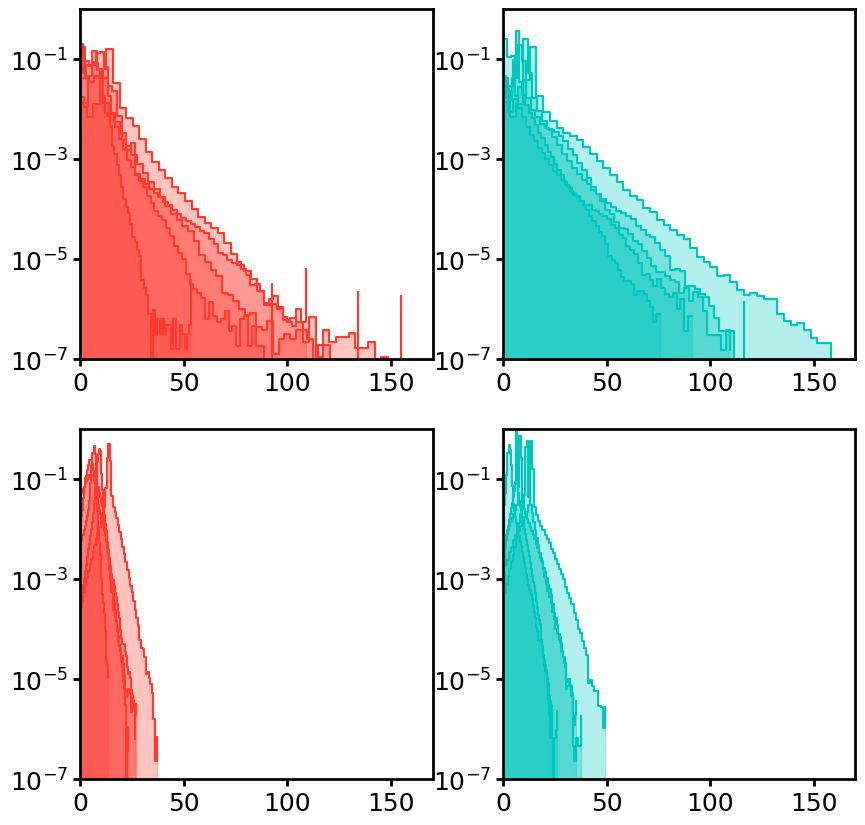

In [ ]:
# Plot the histograms of the muscle spindles, 2x2 figure with 10 histograms (spindle FRs) in each subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

triceps_color = "00C7BE"  # Hex value
biceps_color = "FF3B30"  # Hex value

triceps_color = [int(triceps_color[i:i+2], 16) / 255 for i in (0, 2, 4)]
biceps_color = [int(biceps_color[i:i+2], 16) / 255 for i in (0, 2, 4)]

for i in range(5):
    # Get histogram data for biceps
    counts, bin_edges = np.histogram(
        biceps_spindles_flag[:, i, :].flatten(),
        bins=50, density=True
    )
    # Prevent log(0) by replacing zeros with a small value
    counts[counts == 0] = 1e-10

    # Plot the fill and envelope for biceps
    axs[0, 0].fill_between(
        bin_edges[:-1], counts, step="post", alpha=0.3, color=biceps_color, rasterized=True
    )
    axs[0, 0].plot(
        bin_edges[:-1], counts, drawstyle="steps-post", color=biceps_color, alpha=1.0, rasterized=True
    )

    # Get histogram data for triceps
    counts, bin_edges = np.histogram(
        triceps_spindles_flag[:, i, :].flatten(),
        bins=50, density=True
    )
    counts[counts == 0] = 1e-10

    axs[0, 1].fill_between(
        bin_edges[:-1], counts, step="post", alpha=0.3, color=triceps_color, rasterized=True
    )
    axs[0, 1].plot(
        bin_edges[:-1], counts, drawstyle="steps-post", color=triceps_color, alpha=1.0, rasterized=True
    )

    # Repeat for PCR data for biceps
    counts, bin_edges = np.histogram(
        biceps_spindles_pcr[:, i, :].flatten(),
        bins=50, density=True
    )
    counts[counts == 0] = 1e-10

    axs[1, 0].fill_between(
        bin_edges[:-1], counts, step="post", alpha=0.3, color=biceps_color, rasterized=True
    )
    axs[1, 0].plot(
        bin_edges[:-1], counts, drawstyle="steps-post", color=biceps_color, alpha=1.0, rasterized=True
    )

    # Repeat for PCR data for triceps
    counts, bin_edges = np.histogram(
        triceps_spindles_pcr[:, i, :].flatten(),
        bins=50, density=True
    )
    counts[counts == 0] = 1e-10

    axs[1, 1].fill_between(
        bin_edges[:-1], counts, step="post", alpha=0.3, color=triceps_color, rasterized=True
    )
    axs[1, 1].plot(
        bin_edges[:-1], counts, drawstyle="steps-post", color=triceps_color, alpha=1.0, rasterized=True
    )

# Set logarithmic scale for y-axis on all subplots
for ax in axs.flat:
    ax.set_xlim([0, 170])
    ax.set_yscale("log")  # Apply logarithmic scale
    ax.set_ylim([1e-7, 1])  # Set the y-axis limits

plt.show()

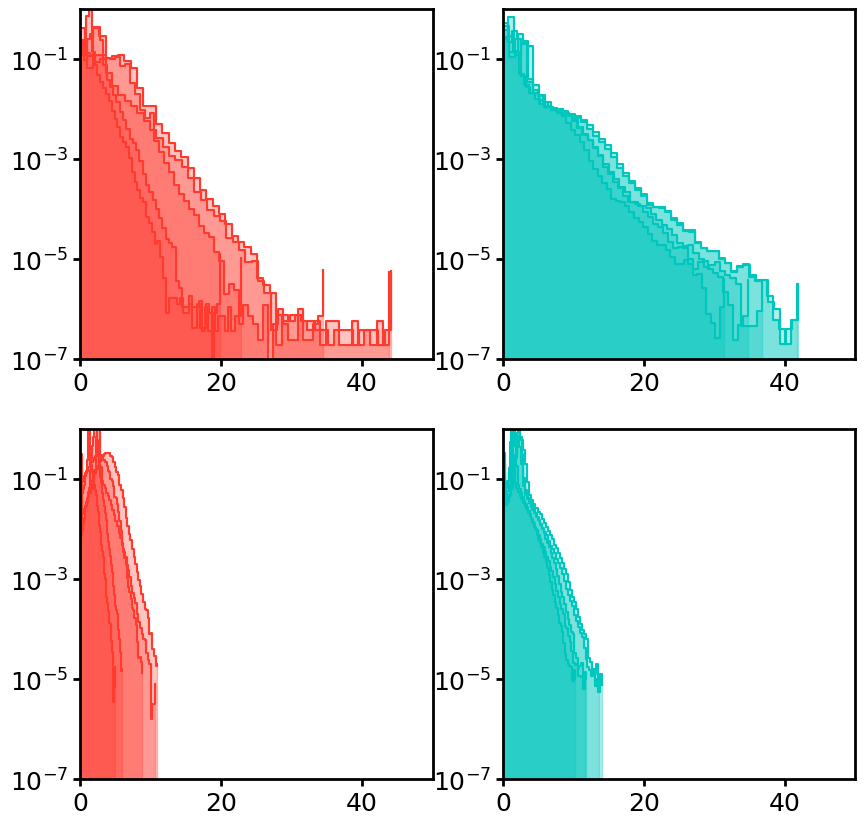

In [ ]:
# Plot the histograms of the muscle spindles, 2x2 figure with 10 histograms (spindle FRs) in each subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

triceps_color = "00C7BE"  # Hex value
biceps_color = "FF3B30"  # Hex value

triceps_color = [int(triceps_color[i:i+2], 16) / 255 for i in (0, 2, 4)]
biceps_color = [int(biceps_color[i:i+2], 16) / 255 for i in (0, 2, 4)]

for i in range(5, 10):
    # Get histogram data for biceps
    counts, bin_edges = np.histogram(
        biceps_spindles_flag[:, i, :].flatten(),
        bins=50, density=True
    )
    # Prevent log(0) by replacing zeros with a small value
    counts[counts == 0] = 1e-10

    # Plot the fill and envelope for biceps
    axs[0, 0].fill_between(
        bin_edges[:-1], counts, step="post", alpha=0.3, color=biceps_color, rasterized=True
    )
    axs[0, 0].plot(
        bin_edges[:-1], counts, drawstyle="steps-post", color=biceps_color, alpha=1.0, rasterized=True
    )

    # Get histogram data for triceps
    counts, bin_edges = np.histogram(
        triceps_spindles_flag[:, i, :].flatten(),
        bins=50, density=True
    )
    counts[counts == 0] = 1e-10

    axs[0, 1].fill_between(
        bin_edges[:-1], counts, step="post", alpha=0.3, color=triceps_color, rasterized=True
    )
    axs[0, 1].plot(
        bin_edges[:-1], counts, drawstyle="steps-post", color=triceps_color, alpha=1.0, rasterized=True
    )

    # Repeat for PCR data for biceps
    counts, bin_edges = np.histogram(
        biceps_spindles_pcr[:, i, :].flatten(),
        bins=50, density=True
    )
    counts[counts == 0] = 1e-10

    axs[1, 0].fill_between(
        bin_edges[:-1], counts, step="post", alpha=0.3, color=biceps_color, rasterized=True
    )
    axs[1, 0].plot(
        bin_edges[:-1], counts, drawstyle="steps-post", color=biceps_color, alpha=1.0, rasterized=True
    )

    # Repeat for PCR data for triceps
    counts, bin_edges = np.histogram(
        triceps_spindles_pcr[:, i, :].flatten(),
        bins=50, density=True
    )
    counts[counts == 0] = 1e-10

    axs[1, 1].fill_between(
        bin_edges[:-1], counts, step="post", alpha=0.3, color=triceps_color, rasterized=True
    )
    axs[1, 1].plot(
        bin_edges[:-1], counts, drawstyle="steps-post", color=triceps_color, alpha=1.0, rasterized=True
    )

# Set logarithmic scale for y-axis on all subplots
for ax in axs.flat:
    ax.set_xlim([0, 50])
    ax.set_yscale("log")  # Apply logarithmic scale
    ax.set_ylim([1e-7, 1])  # Set the y-axis limits

plt.show()